In [6]:
# Lets try divided differences on a simple
# example

f = x -> sin(x) # "anonymous function"
f′ = x -> cos(x)


# want to compute f′(x) = f′(1) (= cos(1))
x = 1

# try a very small h
h = 2.0^(-100)
(f(x+h) - f(x))/h, cos(1) # FAIL! 4 ≠ ℯ

(0.0, 0.5403023058681398)

In [7]:
# Making h _bigger_ somewhat succeeds (??):
h = 2.0^(-25)
(f(x+h) - f(x))/h - f′(x) # accurate to roughly 8 digits

-1.4355650446162826e-8

In [13]:
x + h # a number + a vector makes no sense;

LoadError: MethodError: no method matching +(::Int64, ::Vector{Float64})
For element-wise addition, use broadcasting with dot syntax: scalar .+ array
[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:591
[0m  +(::T, [91m::T[39m) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at int.jl:87
[0m  +(::Union{Int16, Int32, Int64, Int8}, [91m::BigInt[39m) at gmp.jl:537
[0m  ...

In [15]:
f.(x .+ h) # this adds x to each entry of h then applies f, making a vector [f(x+h[1]), f(x+h[2]),… ]

61-element Vector{Float64}:
 0.9092974268256817
 0.9974949866040544
 0.9489846193555862
 0.9022675940990952
 0.8735749351670712
 0.8579418428124834
 0.8498101482900483
 0.8456663741073475
 0.8435751154168105
 0.8425246571000955
 0.8419982224500037
 0.8417347039715442
 0.8416028694714403
 ⋮
 0.8414709848078975
 0.841470984807897
 0.8414709848078967
 0.8414709848078966
 0.8414709848078965
 0.8414709848078965
 0.8414709848078965
 0.8414709848078965
 0.8414709848078965
 0.8414709848078965
 0.8414709848078965
 0.8414709848078965

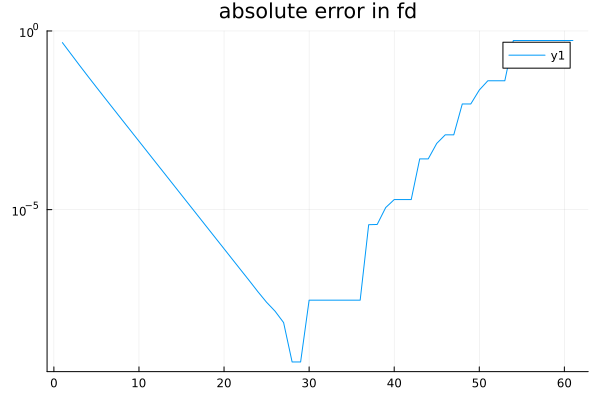

In [19]:
# Lets plot the error as a function of h
using Plots

h = [2.0^k for k=0:-1:-60] # h = [1,1/2,1/4,…,1/2^(-60)]

# starts converging.... then starts diverging
fd = (f.(x .+ h) .- f(x))./h # this is the same as [(f(x+h[1])-f(x))/h[1], (f(x+h[2])-f(x))/h[2], …]
plot(abs.(fd .- f′(x)); yscale=:log10, title="absolute error in fd")

# next lecture we will explain this by bounding the error

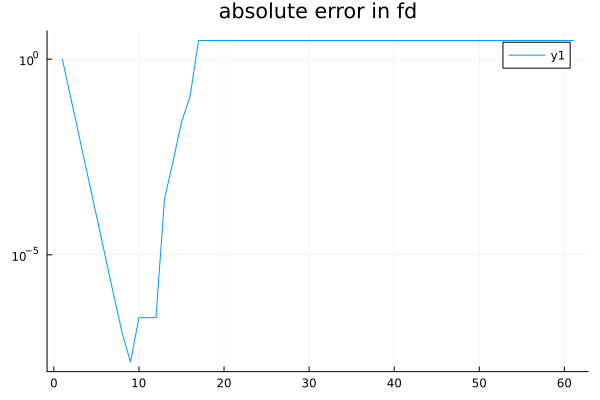

In [26]:
f = x -> 1 + x + x^2
f′ = x -> 1 + 2x

h = [10.0^k for k=0:-1:-60] # h = [1,1/2,1/4,…,1/2^(-60)]

# starts converging.... then starts diverging
fd = (f.(x .+ h) .- f(x))./h # this is the same as [(f(x+h[1])-f(x))/h[1], (f(x+h[2])-f(x))/h[2], …]

nanabs = x -> x == 0 ? NaN : abs(x)
plot(nanabs.(fd .- f′(x)); yscale=:log10, title="absolute error in fd")

# next lecture we will explain this by bounding the error

# in very special cases, FD works well
# but small changes make it break again

In [23]:
fd .- f′(x)

61-element Vector{Float64}:
  1.0
  0.5
  0.25
  0.125
  0.0625
  0.03125
  0.015625
  0.0078125
  0.00390625
  0.001953125
  0.0009765625
  0.00048828125
  0.000244140625
  ⋮
  0.0
  0.0
  0.0
 -1.0
 -3.0
 -3.0
 -3.0
 -3.0
 -3.0
 -3.0
 -3.0
 -3.0